In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import sklearn
import scanpy as sc
import os

In [2]:
spatialLIBD_dir = 'data/spatialLIBD_data'

In [3]:
# spots = pd.read_csv(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_counts.csv'), header = 0, index_col = 0, sep =',')
# st = pd.read_csv(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_st.csv'))
# gene_meta = pd.read_csv(os.path.join(spatialLIBD_dir, 'gene_meta.csv'))
# cell_type = pd.read_csv(os.path.join(spatialLIBD_dir, 'RowDataTable1.csv'))
# csr = pd.read_csv(os.path.join(spatialLIBD_dir, 'spatialLIBD_csr_counts_sample_id.csv'), index_col=0)

In [4]:
# spots.to_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_counts.pkl'))
# st.to_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_st.pkl'))
# gene_meta.to_pickle(os.path.join(spatialLIBD_dir, 'gene_meta.pkl'))
# cell_type.to_pickle(os.path.join(spatialLIBD_dir, 'RowDataTable1.pkl'))
# csr.to_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_csr_counts_sample_id.pkl'))

In [5]:
spots = pd.read_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_counts.pkl'))
st = pd.read_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_spot_st.pkl'))
gene_meta = pd.read_pickle(os.path.join(spatialLIBD_dir, 'gene_meta.pkl'))
cell_type = pd.read_pickle(os.path.join(spatialLIBD_dir, 'RowDataTable1.pkl'))
csr = pd.read_pickle(os.path.join(spatialLIBD_dir, 'spatialLIBD_csr_counts_sample_id.pkl'))

In [6]:
print('spots')
display(spots)
print('st')
display(st)
print('gene_meta')
display(gene_meta)
print('cell_type')
display(cell_type)
print('csr')
display(csr)

spots


,sample_id,Cluster,sum_umi,sum_gene,subject,position,replicate,subject_position,discard,key,...,SpatialDE_UMAP_spatial,SpatialDE_pool_UMAP_spatial,HVG_UMAP_spatial,pseudobulk_UMAP_spatial,markers_UMAP_spatial,spatialLIBD,ManualAnnotation,in_tissue,array_row,array_col
AAACAACGAATAGTTC-1,151507,6,948,727,Br5292,0,1,Br5292_pos0,False,151507_AAACAACGAATAGTTC-1,...,1,1,1,1,1,L1,NaN,True,0,16
AAACAAGTATCTCCCA-1,151507,3,4261,2170,Br5292,0,1,Br5292_pos0,False,151507_AAACAAGTATCTCCCA-1,...,2,2,1,2,1,L3,NaN,True,50,102
AAACAATCTACTAGCA-1,151507,2,1969,1093,Br5292,0,1,Br5292_pos0,False,151507_AAACAATCTACTAGCA-1,...,2,1,4,1,6,L1,NaN,True,3,43
AAACACCAATAACTGC-1,151507,5,3368,1896,Br5292,0,1,Br5292_pos0,False,151507_AAACACCAATAACTGC-1,...,7,8,7,8,1,WM,NaN,True,59,19
AAACAGCTTTCAGAAG-1,151507,1,2981,1620,Br5292,0,1,Br5292_pos0,False,151507_AAACAGCTTTCAGAAG-1,...,8,2,8,1,1,L6,NaN,True,43,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1.11,151676,5,2880,1638,Br8100,300,2,Br8100_pos300,False,151676_TTGTTGTGTGTCAAGA-1,...,6,1,4,1,1,L6,NaN,True,31,77
TTGTTTCACATCCAGG-1.11,151676,2,2640,1526,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCACATCCAGG-1,...,5,5,5,8,1,WM,NaN,True,58,42
TTGTTTCATTAGTCTA-1.11,151676,2,2063,1279,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCATTAGTCTA-1,...,5,5,8,1,1,WM,NaN,True,60,30
TTGTTTCCATACAACT-1.11,151676,7,1031,748,Br8100,300,2,Br8100_pos300,False,151676_TTGTTTCCATACAACT-1,...,2,3,2,4,7,L6,NaN,True,45,27


st


,Unnamed: 0,pxl_col_in_fullres,pxl_row_in_fullres
0,AAACAACGAATAGTTC-1,3276,2514
1,AAACAAGTATCTCCCA-1,9178,8520
2,AAACAATCTACTAGCA-1,5133,2878
3,AAACACCAATAACTGC-1,3462,9581
4,AAACAGCTTTCAGAAG-1,2779,7663
...,...,...,...
47676,TTGTTGTGTGTCAAGA-1,7946,6378
47677,TTGTTTCACATCCAGG-1,5512,9594
47678,TTGTTTCATTAGTCTA-1,4684,9827
47679,TTGTTTCCATACAACT-1,4491,8029


gene_meta


,Unnamed: 0,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype,gene_search,is_top_hvg
0,ENSG00000243485,havana,gene,ENSG00000243485,5,MIR1302-2HG,havana,lincRNA,MIR1302-2HG; ENSG00000243485,False
1,ENSG00000237613,havana,gene,ENSG00000237613,2,FAM138A,havana,lincRNA,FAM138A; ENSG00000237613,False
2,ENSG00000186092,ensembl_havana,gene,ENSG00000186092,6,OR4F5,ensembl_havana,protein_coding,OR4F5; ENSG00000186092,False
3,ENSG00000238009,ensembl_havana,gene,ENSG00000238009,6,AL627309.1,ensembl_havana,lincRNA,AL627309.1; ENSG00000238009,False
4,ENSG00000239945,havana,gene,ENSG00000239945,1,AL627309.3,havana,lincRNA,AL627309.3; ENSG00000239945,False
...,...,...,...,...,...,...,...,...,...,...
33533,ENSG00000277856,ensembl,gene,ENSG00000277856,1,AC233755.2,ensembl,protein_coding,AC233755.2; ENSG00000277856,False
33534,ENSG00000275063,ensembl,gene,ENSG00000275063,1,AC233755.1,ensembl,protein_coding,AC233755.1; ENSG00000275063,False
33535,ENSG00000271254,ensembl,gene,ENSG00000271254,6,AC240274.1,ensembl,protein_coding,AC240274.1; ENSG00000271254,False
33536,ENSG00000277475,ensembl,gene,ENSG00000277475,1,AC213203.1,ensembl,protein_coding,AC213203.1; ENSG00000277475,False


cell_type


,Unnamed: 0,ID,gene_biotype,Symbol,propNucleiExprs,propExprsIn.Astro,propExprsIn.Excit_A,propExprsIn.Excit_B,propExprsIn.Excit_C,propExprsIn.Excit_D,...,propExprsIn.Inhib_C,propExprsIn.Inhib_D,propExprsIn.Inhib_E,propExprsIn.Inhib_F,propExprsIn.Macrophage,propExprsIn.Micro,propExprsIn.Mural,propExprsIn.Oligo,propExprsIn.OPC,propExprsIn.Tcell
0,MIR1302-2HG,ENSG00000243485,lincRNA,MIR1302-2HG,0.000179,0.000000,0.000000,0.001294,0.000000,0.000000,...,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
1,FAM138A,ENSG00000237613,lincRNA,FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
2,OR4F5,ENSG00000186092,protein_coding,OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
3,AL627309.1,ENSG00000238009,lincRNA,AL627309.1,0.095876,0.033248,0.240076,0.124191,0.282443,0.212121,...,0.158904,0.196126,0.142857,0.125,0.0,0.046392,0.0,0.04473,0.031469,0.000000
4,AL627309.3,ENSG00000239945,lincRNA,AL627309.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,AC233755.2,ENSG00000277856,protein_coding,AC233755.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
33534,AC233755.1,ENSG00000275063,protein_coding,AC233755.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
33535,AC240274.1,ENSG00000271254,protein_coding,AC240274.1,0.066149,0.051151,0.086957,0.082794,0.131679,0.045455,...,0.115068,0.181598,0.000000,0.125,0.0,0.033505,0.0,0.03758,0.064685,0.111111
33536,AC213203.1,ENSG00000277475,protein_coding,AC213203.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000


csr


,gene,spot,sample_id,count
1,ENSG00000187608,AAACAACGAATAGTTC-1,151507,1
2,ENSG00000132906,AAACAACGAATAGTTC-1,151507,1
3,ENSG00000116786,AAACAACGAATAGTTC-1,151507,1
4,ENSG00000162545,AAACAACGAATAGTTC-1,151507,1
5,ENSG00000142669,AAACAACGAATAGTTC-1,151507,2
...,...,...,...,...
82659003,ENSG00000212907,TTGTTTGTGTAAATTC-1,151676,2
82659004,ENSG00000198886,TTGTTTGTGTAAATTC-1,151676,72
82659005,ENSG00000198786,TTGTTTGTGTAAATTC-1,151676,7
82659006,ENSG00000198695,TTGTTTGTGTAAATTC-1,151676,1


In [7]:
spots.columns

Index(['sample_id', 'Cluster', 'sum_umi', 'sum_gene', 'subject', 'position',
       'replicate', 'subject_position', 'discard', 'key', 'cell_count',
       'SNN_k50_k4', 'SNN_k50_k5', 'SNN_k50_k6', 'SNN_k50_k7', 'SNN_k50_k8',
       'SNN_k50_k9', 'SNN_k50_k10', 'SNN_k50_k11', 'SNN_k50_k12',
       'SNN_k50_k13', 'SNN_k50_k14', 'SNN_k50_k15', 'SNN_k50_k16',
       'SNN_k50_k17', 'SNN_k50_k18', 'SNN_k50_k19', 'SNN_k50_k20',
       'SNN_k50_k21', 'SNN_k50_k22', 'SNN_k50_k23', 'SNN_k50_k24',
       'SNN_k50_k25', 'SNN_k50_k26', 'SNN_k50_k27', 'SNN_k50_k28',
       'GraphBased', 'Maynard', 'Martinowich', 'layer_guess',
       'layer_guess_reordered', 'layer_guess_reordered_short', 'expr_chrM',
       'expr_chrM_ratio', 'SpatialDE_PCA', 'SpatialDE_pool_PCA', 'HVG_PCA',
       'pseudobulk_PCA', 'markers_PCA', 'SpatialDE_UMAP',
       'SpatialDE_pool_UMAP', 'HVG_UMAP', 'pseudobulk_UMAP', 'markers_UMAP',
       'SpatialDE_PCA_spatial', 'SpatialDE_pool_PCA_spatial',
       'HVG_PCA_spatial', 'ps

In [8]:
# rename st column names
st.columns = ["spot", "X", "Y"]
st.head()

,spot,X,Y
0,AAACAACGAATAGTTC-1,3276,2514
1,AAACAAGTATCTCCCA-1,9178,8520
2,AAACAATCTACTAGCA-1,5133,2878
3,AAACACCAATAACTGC-1,3462,9581
4,AAACAGCTTTCAGAAG-1,2779,7663


In [9]:
spot = spots[['sample_id', 'key', 'subject', 'replicate', 'Cluster', 'sum_umi', 'sum_gene', 'cell_count', 'in_tissue','spatialLIBD', 'array_col', 'array_row']]
spot

,sample_id,key,subject,replicate,Cluster,sum_umi,sum_gene,cell_count,in_tissue,spatialLIBD,array_col,array_row
AAACAACGAATAGTTC-1,151507,151507_AAACAACGAATAGTTC-1,Br5292,1,6,948,727,0,True,L1,16,0
AAACAAGTATCTCCCA-1,151507,151507_AAACAAGTATCTCCCA-1,Br5292,1,3,4261,2170,3,True,L3,102,50
AAACAATCTACTAGCA-1,151507,151507_AAACAATCTACTAGCA-1,Br5292,1,2,1969,1093,2,True,L1,43,3
AAACACCAATAACTGC-1,151507,151507_AAACACCAATAACTGC-1,Br5292,1,5,3368,1896,5,True,WM,19,59
AAACAGCTTTCAGAAG-1,151507,151507_AAACAGCTTTCAGAAG-1,Br5292,1,1,2981,1620,3,True,L6,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1.11,151676,151676_TTGTTGTGTGTCAAGA-1,Br8100,2,5,2880,1638,1,True,L6,77,31
TTGTTTCACATCCAGG-1.11,151676,151676_TTGTTTCACATCCAGG-1,Br8100,2,2,2640,1526,6,True,WM,42,58
TTGTTTCATTAGTCTA-1.11,151676,151676_TTGTTTCATTAGTCTA-1,Br8100,2,2,2063,1279,9,True,WM,30,60
TTGTTTCCATACAACT-1.11,151676,151676_TTGTTTCCATACAACT-1,Br8100,2,7,1031,748,2,True,L6,27,45


In [10]:
# merge spot and st info -- merging based on index... no other specifying info in st:S, seems okay?
spot_meta = st.join(spot.reset_index())
spot_meta


,spot,X,Y,index,sample_id,key,subject,replicate,Cluster,sum_umi,sum_gene,cell_count,in_tissue,spatialLIBD,array_col,array_row
0,AAACAACGAATAGTTC-1,3276,2514,AAACAACGAATAGTTC-1,151507,151507_AAACAACGAATAGTTC-1,Br5292,1,6,948,727,0,True,L1,16,0
1,AAACAAGTATCTCCCA-1,9178,8520,AAACAAGTATCTCCCA-1,151507,151507_AAACAAGTATCTCCCA-1,Br5292,1,3,4261,2170,3,True,L3,102,50
2,AAACAATCTACTAGCA-1,5133,2878,AAACAATCTACTAGCA-1,151507,151507_AAACAATCTACTAGCA-1,Br5292,1,2,1969,1093,2,True,L1,43,3
3,AAACACCAATAACTGC-1,3462,9581,AAACACCAATAACTGC-1,151507,151507_AAACACCAATAACTGC-1,Br5292,1,5,3368,1896,5,True,WM,19,59
4,AAACAGCTTTCAGAAG-1,2779,7663,AAACAGCTTTCAGAAG-1,151507,151507_AAACAGCTTTCAGAAG-1,Br5292,1,1,2981,1620,3,True,L6,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47676,TTGTTGTGTGTCAAGA-1,7946,6378,TTGTTGTGTGTCAAGA-1.11,151676,151676_TTGTTGTGTGTCAAGA-1,Br8100,2,5,2880,1638,1,True,L6,77,31
47677,TTGTTTCACATCCAGG-1,5512,9594,TTGTTTCACATCCAGG-1.11,151676,151676_TTGTTTCACATCCAGG-1,Br8100,2,2,2640,1526,6,True,WM,42,58
47678,TTGTTTCATTAGTCTA-1,4684,9827,TTGTTTCATTAGTCTA-1.11,151676,151676_TTGTTTCATTAGTCTA-1,Br8100,2,2,2063,1279,9,True,WM,30,60
47679,TTGTTTCCATACAACT-1,4491,8029,TTGTTTCCATACAACT-1.11,151676,151676_TTGTTTCCATACAACT-1,Br8100,2,7,1031,748,2,True,L6,27,45


In [11]:
assert((spot_meta.spot.isin(spot_meta['index'])).all())

In [12]:
def plot_cell_layers(df):
    
    layer_idx = df["spatialLIBD"].unique()
    
    fig, ax = plt.subplots(nrows = 1, ncols = 12, figsize = (50,6))
    samples = df["sample_id"].unique()
    
    for idx, sample in enumerate(samples):
        cells_of_samples = df[df["sample_id"] == sample]
        for index in layer_idx:
            cells_of_layer = cells_of_samples[cells_of_samples["spatialLIBD"] == index]
            ax[idx].scatter(-cells_of_layer["Y"], cells_of_layer["X"], label = index)
        ax[idx].set_title(sample)
    plt.legend()
    plt.show()

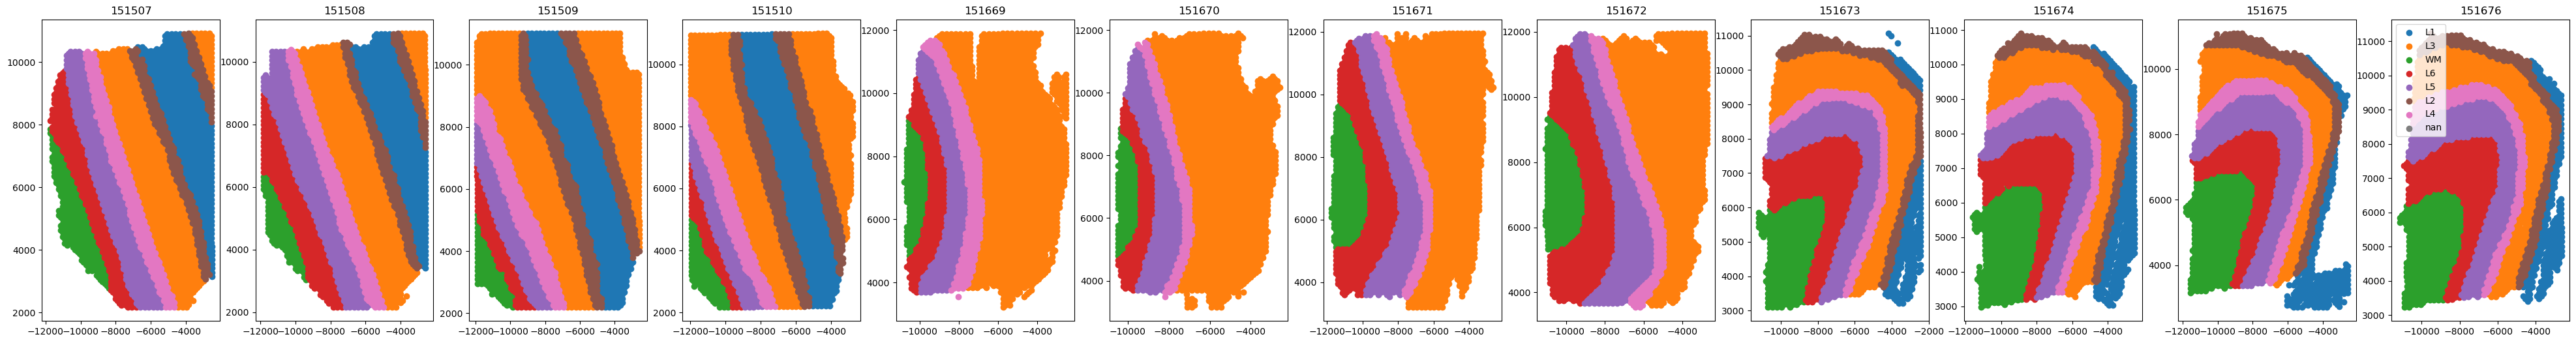

In [13]:
plot_cell_layers(spot_meta) 

In [14]:
cell_type

,Unnamed: 0,ID,gene_biotype,Symbol,propNucleiExprs,propExprsIn.Astro,propExprsIn.Excit_A,propExprsIn.Excit_B,propExprsIn.Excit_C,propExprsIn.Excit_D,...,propExprsIn.Inhib_C,propExprsIn.Inhib_D,propExprsIn.Inhib_E,propExprsIn.Inhib_F,propExprsIn.Macrophage,propExprsIn.Micro,propExprsIn.Mural,propExprsIn.Oligo,propExprsIn.OPC,propExprsIn.Tcell
0,MIR1302-2HG,ENSG00000243485,lincRNA,MIR1302-2HG,0.000179,0.000000,0.000000,0.001294,0.000000,0.000000,...,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
1,FAM138A,ENSG00000237613,lincRNA,FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
2,OR4F5,ENSG00000186092,protein_coding,OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
3,AL627309.1,ENSG00000238009,lincRNA,AL627309.1,0.095876,0.033248,0.240076,0.124191,0.282443,0.212121,...,0.158904,0.196126,0.142857,0.125,0.0,0.046392,0.0,0.04473,0.031469,0.000000
4,AL627309.3,ENSG00000239945,lincRNA,AL627309.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,AC233755.2,ENSG00000277856,protein_coding,AC233755.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
33534,AC233755.1,ENSG00000275063,protein_coding,AC233755.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000
33535,AC240274.1,ENSG00000271254,protein_coding,AC240274.1,0.066149,0.051151,0.086957,0.082794,0.131679,0.045455,...,0.115068,0.181598,0.000000,0.125,0.0,0.033505,0.0,0.03758,0.064685,0.111111
33536,AC213203.1,ENSG00000277475,protein_coding,AC213203.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.0,0.00000,0.000000,0.000000


In [15]:
cell_type = cell_type.set_index("Symbol")

In [16]:
cell_type_idx_df = cell_type.iloc[:,:3]

In [17]:
cell_type = cell_type.drop(['Unnamed: 0', 'gene_biotype', "ID"], axis=1)

In [18]:
del spots
del spot
del gene_meta
del st

In [19]:
wide = csr.pivot_table(index = ["sample_id", "spot"], columns = "gene", values = "count").fillna(0).astype(pd.SparseDtype("float", 0.0))
# wide = wide.fillna(0)
# wide = wide.astype(pd.SparseDtype("float", 0.0))


In [20]:
counts_df = wide
counts_df

gene                          ENSG00000000003  ENSG00000000005  \
sample_id spot                                                   
151507    AAACAACGAATAGTTC-1              0.0              0.0   
          AAACAAGTATCTCCCA-1              0.0              0.0   
          AAACAATCTACTAGCA-1              0.0              0.0   
          AAACACCAATAACTGC-1              0.0              0.0   
          AAACAGCTTTCAGAAG-1              0.0              0.0   
...                                       ...              ...   
151676    TTGTTGTGTGTCAAGA-1              0.0              0.0   
          TTGTTTCACATCCAGG-1              0.0              0.0   
          TTGTTTCATTAGTCTA-1              0.0              0.0   
          TTGTTTCCATACAACT-1              0.0              0.0   
          TTGTTTGTGTAAATTC-1              0.0              0.0   

gene                          ENSG00000000419  ENSG00000000457  \
sample_id spot                                                   
151507    AAACAACGAATAGTTC-1              0.0              0.0   
          AAACAAGTATCTCCCA-1              0.0              0.0   
          AAACAATCTACTAGCA-1              0.0              0.0   
          AAACACCAATAACTGC-1              0.0              0.0   
          AAACAGCTTTCAGAAG-1              0.0              0.0   
...                                       ...              ...   
151676    TTGTTGTGTGTCAAGA-1              0.0              0.0   
          TTGTTTCACATCCAGG-1              0.0              0.0   
          TTGTTTCATTAGTCTA-1              0.0              0.0   
          TTGTTTCCATACAACT-1              0.0              0.0   
          TTGTTTGTGTAAATTC-1              0.0              0.0   

gene                          ENSG00000000460  ENSG00000000938  \
sample_id spot                                                   
151507    AAACAACGAATAGTTC-1              0.0              0.0   
          AAACAAGTATCTCCCA-1              0.0              0.0   
          AAACAATCTACTAGCA-1              0.0              0.0   
          AAACACCAATAACTGC-1              0.0              0.0   
          AAACAGCTTTCAGAAG-1              0.0              0.0   
...                                       ...              ...   
151676    TTGTTGTGTGTCAAGA-1              0.0              0.0   
          TTGTTTCACATCCAGG-1              0.0              0.0   
          TTGTTTCATTAGTCTA-1              0.0              0.0   
          TTGTTTCCATACAACT-1              0.0              0.0   
          TTGTTTGTGTAAATTC-1              0.0              0.0   

gene                          ENSG00000000971  ENSG00000001036  \
sample_id spot                                                   
151507    AAACAACGAATAGTTC-1              0.0              0.0   
          AAACAAGTATCTCCCA-1              0.0              0.0   
          AAACAATCTACTAGCA-1              0.0              0.0   
          AAACACCAATAACTGC-1              0.0              0.0   
          AAACAGCTTTCAGAAG-1              0.0              0.0   
...                                       ...              ...   
151676    TTGTTGTGTGTCAAGA-1              0.0              0.0   
          TTGTTTCACATCCAGG-1              0.0              0.0   
          TTGTTTCATTAGTCTA-1              0.0              0.0   
          TTGTTTCCATACAACT-1              0.0              0.0   
          TTGTTTGTGTAAATTC-1              0.0              0.0   

gene                          ENSG00000001084  ENSG00000001167  ...  \
sample_id spot                                                  ...   
151507    AAACAACGAATAGTTC-1              0.0              0.0  ...   
          AAACAAGTATCTCCCA-1              1.0              0.0  ...   
          AAACAATCTACTAGCA-1              0.0              0.0  ...   
          AAACACCAATAACTGC-1              0.0              0.0  ...   
          AAACAGCTTTCAGAAG-1              0.0              0.0  ...   
...                                       ...              ...  ...

In [21]:
ID_to_symbol_d = cell_type_idx_df.ID.reset_index().set_index('ID')['Symbol'].to_dict()

In [22]:
counts_df.columns = counts_df.columns.map(ID_to_symbol_d, na_action=None)
counts_df

gene                          TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR  CFH  \
sample_id spot                                                                
151507    AAACAACGAATAGTTC-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
          AAACAAGTATCTCCCA-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
          AAACAATCTACTAGCA-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
          AAACACCAATAACTGC-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
          AAACAGCTTTCAGAAG-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
...                              ...   ...   ...    ...       ...  ...  ...   
151676    TTGTTGTGTGTCAAGA-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
          TTGTTTCACATCCAGG-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
          TTGTTTCATTAGTCTA-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
          TTGTTTCCATACAACT-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   
          TTGTTTGTGTAAATTC-1     0.0   0.0   0.0    0.0       0.0  0.0  0.0   

gene                          FUCA2  GCLC  NFYA  ...  AL162377.3  ZNF883  \
sample_id spot                                   ...                       
151507    AAACAACGAATAGTTC-1    0.0   0.0   0.0  ...         0.0     0.0   
          AAACAAGTATCTCCCA-1    0.0   1.0   0.0  ...         0.0     0.0   
          AAACAATCTACTAGCA-1    0.0   0.0   0.0  ...         0.0     0.0   
          AAACACCAATAACTGC-1    0.0   0.0   0.0  ...         0.0     0.0   
          AAACAGCTTTCAGAAG-1    0.0   0.0   0.0  ...         0.0     0.0   
...                             ...   ...   ...  ...         ...     ...   
151676    TTGTTGTGTGTCAAGA-1    0.0   0.0   0.0  ...         0.0     0.0   
          TTGTTTCACATCCAGG-1    0.0   0.0   0.0  ...         0.0     0.0   
          TTGTTTCATTAGTCTA-1    0.0   0.0   0.0  ...         0.0     0.0   
          TTGTTTCCATACAACT-1    0.0   0.0   0.0  ...         0.0     0.0   
          TTGTTTGTGTAAATTC-1    0.0   0.0   0.0  ...         0.0     0.0   

gene                          AC111006.1  AC093827.5  AL691520.1  AC139491.7  \
sample_id spot                                                                 
151507    AAACAACGAATAGTTC-1         0.0         0.0         0.0         0.0   
          AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0   
          AAACAATCTACTAGCA-1         0.0         0.0         0.0         0.0   
          AAACACCAATAACTGC-1         0.0         0.0         0.0         0.0   
          AAACAGCTTTCAGAAG-1         0.0         0.0         0.0         0.0   
...                                  ...         ...         ...         ...   
151676    TTGTTGTGTGTCAAGA-1         0.0         0.0         0.0         0.0   
          TTGTTTCACATCCAGG-1         0.0         0.0         0.0         0.0   
          TTGTTTCATTAGTCTA-1         0.0         0.0         0.0         0.0   
          TTGTTTCCATACAACT-1         0.0         0.0         0.0         0.0   
          TTGTTTGTGTAAATTC-1         0.0         0.0         0.0         2.0   

gene                          AC021097.2  AC003043.2  AL356417.3  AP000646.1  
sample_id spot                                                                
151507    AAACAACGAATAGTTC-1         0.0         0.0         0.0         0.0  
          AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0  
          AAACAATCTACTAGCA-1         0.0         0.0         0.0         0.0  
          AAACACCAATAACTGC-1         0.0         0.0         0.0         0.0  
          AAACAGCTTTCAGAAG-1         0.0         0.0         0.0         0.0  
...                                  ...         ...         ...         ...  
151676    TTGTTGTGTGTCAAGA-1         0.0         0.0         0.0         0.0  
          TTGTTTCACATCCAGG-1         0.0         0.0         0.0         0.0  
          TTGTTTCATTAGTCTA-1         0.0         0.0         0.0         0.0  
          TTGTTTCCATACAACT-1         0.0         0.0         0.0         

In [23]:
# # working with sampleID 151673 only, for now
# dlpfc = spot_meta[spot_meta['sample_id'] == 151673]
dlpfc = spot_meta

In [24]:
dlpfc = dlpfc.set_index(['sample_id', 'spot'])

In [25]:
dlpfc

X     Y                  index  \
sample_id spot                                                    
151507    AAACAACGAATAGTTC-1  3276  2514     AAACAACGAATAGTTC-1   
          AAACAAGTATCTCCCA-1  9178  8520     AAACAAGTATCTCCCA-1   
          AAACAATCTACTAGCA-1  5133  2878     AAACAATCTACTAGCA-1   
          AAACACCAATAACTGC-1  3462  9581     AAACACCAATAACTGC-1   
          AAACAGCTTTCAGAAG-1  2779  7663     AAACAGCTTTCAGAAG-1   
...                            ...   ...                    ...   
151676    TTGTTGTGTGTCAAGA-1  7946  6378  TTGTTGTGTGTCAAGA-1.11   
          TTGTTTCACATCCAGG-1  5512  9594  TTGTTTCACATCCAGG-1.11   
          TTGTTTCATTAGTCTA-1  4684  9827  TTGTTTCATTAGTCTA-1.11   
          TTGTTTCCATACAACT-1  4491  8029  TTGTTTCCATACAACT-1.11   
          TTGTTTGTGTAAATTC-1  6177  3489  TTGTTTGTGTAAATTC-1.10   

                                                    key subject  replicate  \
sample_id spot                                                               
151507    AAACAACGAATAGTTC-1  151507_AAACAACGAATAGTTC-1  Br5292          1   
          AAACAAGTATCTCCCA-1  151507_AAACAAGTATCTCCCA-1  Br5292          1   
          AAACAATCTACTAGCA-1  151507_AAACAATCTACTAGCA-1  Br5292          1   
          AAACACCAATAACTGC-1  151507_AAACACCAATAACTGC-1  Br5292          1   
          AAACAGCTTTCAGAAG-1  151507_AAACAGCTTTCAGAAG-1  Br5292          1   
...                                                 ...     ...        ...   
151676    TTGTTGTGTGTCAAGA-1  151676_TTGTTGTGTGTCAAGA-1  Br8100          2   
          TTGTTTCACATCCAGG-1  151676_TTGTTTCACATCCAGG-1  Br8100          2   
          TTGTTTCATTAGTCTA-1  151676_TTGTTTCATTAGTCTA-1  Br8100          2   
          TTGTTTCCATACAACT-1  151676_TTGTTTCCATACAACT-1  Br8100          2   
          TTGTTTGTGTAAATTC-1  151676_TTGTTTGTGTAAATTC-1  Br8100          2   

                              Cluster  sum_umi  sum_gene  cell_count  \
sample_id spot                                                         
151507    AAACAACGAATAGTTC-1        6      948       727           0   
          AAACAAGTATCTCCCA-1        3     4261      2170           3   
          AAACAATCTACTAGCA-1        2     1969      1093           2   
          AAACACCAATAACTGC-1        5     3368      1896           5   
          AAACAGCTTTCAGAAG-1        1     2981      1620           3   
...                               ...      ...       ...         ...   
151676    TTGTTGTGTGTCAAGA-1        5     2880      1638           1   
          TTGTTTCACATCCAGG-1        2     2640      1526           6   
          TTGTTTCATTAGTCTA-1        2     2063      1279           9   
          TTGTTTCCATACAACT-1        7     1031       748           2   
          TTGTTTGTGTAAATTC-1        1     2625      1392           0   

                              in_tissue spatialLIBD  array_col  array_row  
sample_id spot                                                             
151507    AAACAACGAATAGTTC-1       True          L1         16          0  
          AAACAAGTATCTCCCA-1       True          L3        102         50  
          AAACAATCTACTAGCA-1       True          L1         43          3  
          AAACACCAATAACTGC-1       True          WM         19         59  
          AAACAGCTTTCAGAAG-1       True          L6          9         43  
...                                 ...         ...        ...        ...  
151676    TTGTTGTGTGTCAAGA-1       True          L6         77         31  
          TTGTTTCACATCCAGG-1       True          WM         42         58  
          TTGTTTCATTAGTCTA-1       True          WM         30         60  
          TTGTTTCCATACAACT-1       True          L6         27         45  
          TTGTTTGTGTAAATTC-1       True          L1         51          7  

[47681 rows x 14 columns]

In [26]:
temp = pd.concat([dlpfc, counts_df], join='inner', axis=1)
temp

X     Y                  index  \
sample_id spot                                                    
151507    AAACAACGAATAGTTC-1  3276  2514     AAACAACGAATAGTTC-1   
          AAACAAGTATCTCCCA-1  9178  8520     AAACAAGTATCTCCCA-1   
          AAACAATCTACTAGCA-1  5133  2878     AAACAATCTACTAGCA-1   
          AAACACCAATAACTGC-1  3462  9581     AAACACCAATAACTGC-1   
          AAACAGCTTTCAGAAG-1  2779  7663     AAACAGCTTTCAGAAG-1   
...                            ...   ...                    ...   
151676    TTGTTGTGTGTCAAGA-1  7946  6378  TTGTTGTGTGTCAAGA-1.11   
          TTGTTTCACATCCAGG-1  5512  9594  TTGTTTCACATCCAGG-1.11   
          TTGTTTCATTAGTCTA-1  4684  9827  TTGTTTCATTAGTCTA-1.11   
          TTGTTTCCATACAACT-1  4491  8029  TTGTTTCCATACAACT-1.11   
          TTGTTTGTGTAAATTC-1  6177  3489  TTGTTTGTGTAAATTC-1.10   

                                                    key subject  replicate  \
sample_id spot                                                               
151507    AAACAACGAATAGTTC-1  151507_AAACAACGAATAGTTC-1  Br5292          1   
          AAACAAGTATCTCCCA-1  151507_AAACAAGTATCTCCCA-1  Br5292          1   
          AAACAATCTACTAGCA-1  151507_AAACAATCTACTAGCA-1  Br5292          1   
          AAACACCAATAACTGC-1  151507_AAACACCAATAACTGC-1  Br5292          1   
          AAACAGCTTTCAGAAG-1  151507_AAACAGCTTTCAGAAG-1  Br5292          1   
...                                                 ...     ...        ...   
151676    TTGTTGTGTGTCAAGA-1  151676_TTGTTGTGTGTCAAGA-1  Br8100          2   
          TTGTTTCACATCCAGG-1  151676_TTGTTTCACATCCAGG-1  Br8100          2   
          TTGTTTCATTAGTCTA-1  151676_TTGTTTCATTAGTCTA-1  Br8100          2   
          TTGTTTCCATACAACT-1  151676_TTGTTTCCATACAACT-1  Br8100          2   
          TTGTTTGTGTAAATTC-1  151676_TTGTTTGTGTAAATTC-1  Br8100          2   

                              Cluster  sum_umi  sum_gene  cell_count  ...  \
sample_id spot                                                        ...   
151507    AAACAACGAATAGTTC-1        6      948       727           0  ...   
          AAACAAGTATCTCCCA-1        3     4261      2170           3  ...   
          AAACAATCTACTAGCA-1        2     1969      1093           2  ...   
          AAACACCAATAACTGC-1        5     3368      1896           5  ...   
          AAACAGCTTTCAGAAG-1        1     2981      1620           3  ...   
...                               ...      ...       ...         ...  ...   
151676    TTGTTGTGTGTCAAGA-1        5     2880      1638           1  ...   
          TTGTTTCACATCCAGG-1        2     2640      1526           6  ...   
          TTGTTTCATTAGTCTA-1        2     2063      1279           9  ...   
          TTGTTTCCATACAACT-1        7     1031       748           2  ...   
          TTGTTTGTGTAAATTC-1        1     2625      1392           0  ...   

                              AL162377.3 ZNF883  AC111006.1  AC093827.5  \
sample_id spot                                                            
151507    AAACAACGAATAGTTC-1         0.0    0.0         0.0         0.0   
          AAACAAGTATCTCCCA-1         0.0    0.0         0.0         0.0   
          AAACAATCTACTAGCA-1         0.0    0.0         0.0         0.0   
          AAACACCAATAACTGC-1         0.0    0.0         0.0         0.0   
          AAACAGCTTTCAGAAG-1         0.0    0.0         0.0         0.0   
...                                  ...    ...         ...         ...   
151676    TTGTTGTGTGTCAAGA-1         0.0    0.0         0.0         0.0   
          TTGTTTCACATCCAGG-1         0.0    0.0         0.0         0.0   
          TTGTTTCATTAGTCTA-1         0.0    0.0         0.0         0.0   
          TTGTTTCCATACAACT-1         0.0    0.0         0.0         0.0   
          TTGTTTGTGTAAATTC-1         0.0    0.0         0.0         0.0   

                              AL691520.1  AC139491.7  AC021097.2  AC003043.2  \
sample_id spot                                                                 
151507  

In [27]:
temp = temp.iloc[:,15:]
temp

TNMD  DPM1  SCYL3  C1orf112  FGR  CFH  FUCA2  \
sample_id spot                                                               
151507    AAACAACGAATAGTTC-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
          AAACAAGTATCTCCCA-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
          AAACAATCTACTAGCA-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
          AAACACCAATAACTGC-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
          AAACAGCTTTCAGAAG-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
...                            ...   ...    ...       ...  ...  ...    ...   
151676    TTGTTGTGTGTCAAGA-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
          TTGTTTCACATCCAGG-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
          TTGTTTCATTAGTCTA-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
          TTGTTTCCATACAACT-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   
          TTGTTTGTGTAAATTC-1   0.0   0.0    0.0       0.0  0.0  0.0    0.0   

                              GCLC  NFYA  STPG1  ...  AL162377.3  ZNF883  \
sample_id spot                                   ...                       
151507    AAACAACGAATAGTTC-1   0.0   0.0    0.0  ...         0.0     0.0   
          AAACAAGTATCTCCCA-1   1.0   0.0    0.0  ...         0.0     0.0   
          AAACAATCTACTAGCA-1   0.0   0.0    0.0  ...         0.0     0.0   
          AAACACCAATAACTGC-1   0.0   0.0    0.0  ...         0.0     0.0   
          AAACAGCTTTCAGAAG-1   0.0   0.0    0.0  ...         0.0     0.0   
...                            ...   ...    ...  ...         ...     ...   
151676    TTGTTGTGTGTCAAGA-1   0.0   0.0    0.0  ...         0.0     0.0   
          TTGTTTCACATCCAGG-1   0.0   0.0    0.0  ...         0.0     0.0   
          TTGTTTCATTAGTCTA-1   0.0   0.0    0.0  ...         0.0     0.0   
          TTGTTTCCATACAACT-1   0.0   0.0    0.0  ...         0.0     0.0   
          TTGTTTGTGTAAATTC-1   0.0   0.0    0.0  ...         0.0     0.0   

                              AC111006.1  AC093827.5  AL691520.1  AC139491.7  \
sample_id spot                                                                 
151507    AAACAACGAATAGTTC-1         0.0         0.0         0.0         0.0   
          AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0   
          AAACAATCTACTAGCA-1         0.0         0.0         0.0         0.0   
          AAACACCAATAACTGC-1         0.0         0.0         0.0         0.0   
          AAACAGCTTTCAGAAG-1         0.0         0.0         0.0         0.0   
...                                  ...         ...         ...         ...   
151676    TTGTTGTGTGTCAAGA-1         0.0         0.0         0.0         0.0   
          TTGTTTCACATCCAGG-1         0.0         0.0         0.0         0.0   
          TTGTTTCATTAGTCTA-1         0.0         0.0         0.0         0.0   
          TTGTTTCCATACAACT-1         0.0         0.0         0.0         0.0   
          TTGTTTGTGTAAATTC-1         0.0         0.0         0.0         2.0   

                              AC021097.2  AC003043.2  AL356417.3  AP000646.1  
sample_id spot                                                                
151507    AAACAACGAATAGTTC-1         0.0         0.0         0.0         0.0  
          AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0  
          AAACAATCTACTAGCA-1         0.0         0.0         0.0         0.0  
          AAACACCAATAACTGC-1         0.0         0.0         0.0         0.0  
          AAACAGCTTTCAGAAG-1         0.0         0.0         0.0         0.0  
...                                  ...         ...         ...         ...  
151676    TTGTTGTGTGTCAAGA-1         0.0         0.0         0.0         0.0  
          TTGTTTCACATCCAGG-1         0.0         0.0         0.0         0.0  
          TTGTTTCATTAGTCTA-1         0.0         0.0         0.0         0.0  
          TTGTTTCCATACAACT-1         0.0         0.0         0.0         0.0  
          TTGTTTGTGTAAATTC-1         

In [28]:
same_genes = cell_type[cell_type.index.isin(temp.columns)]
same_genes

,propNucleiExprs,propExprsIn.Astro,propExprsIn.Excit_A,propExprsIn.Excit_B,propExprsIn.Excit_C,propExprsIn.Excit_D,propExprsIn.Excit_E,propExprsIn.Excit_F,propExprsIn.Inhib_A,propExprsIn.Inhib_B,propExprsIn.Inhib_C,propExprsIn.Inhib_D,propExprsIn.Inhib_E,propExprsIn.Inhib_F,propExprsIn.Macrophage,propExprsIn.Micro,propExprsIn.Mural,propExprsIn.Oligo,propExprsIn.OPC,propExprsIn.Tcell
Symbol,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.000179,0.000000,0.000000,0.001294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AL627309.1,0.095876,0.033248,0.240076,0.124191,0.282443,0.212121,0.320856,0.288066,0.111111,0.134361,0.158904,0.196126,0.142857,0.125,0.0,0.046392,0.000000,0.044730,0.031469,0.000000
AL669831.2,0.000446,0.000000,0.000000,0.000000,0.000000,0.007576,0.000000,0.000000,0.000000,0.002203,0.002740,0.002421,0.000000,0.000,0.0,0.000000,0.000000,0.000183,0.000000,0.000000
AL669831.5,0.336011,0.116368,0.799622,0.667529,0.830153,0.840909,0.828877,0.757202,0.450450,0.491189,0.545205,0.554479,0.285714,0.750,0.0,0.139175,0.166667,0.155454,0.234266,0.111111
FAM87B,0.001250,0.001279,0.000000,0.003881,0.001908,0.000000,0.000000,0.004115,0.003003,0.002203,0.002740,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000550,0.003497,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.4,0.023567,0.019182,0.056711,0.063389,0.076336,0.113636,0.080214,0.032922,0.048048,0.028634,0.021918,0.031477,0.000000,0.125,0.0,0.002577,0.000000,0.005316,0.019231,0.000000
AC007325.2,0.010712,0.121483,0.001890,0.002587,0.003817,0.007576,0.000000,0.012346,0.000000,0.000000,0.005479,0.002421,0.000000,0.000,0.0,0.002577,0.000000,0.001283,0.008741,0.000000
AL354822.1,0.041064,0.033248,0.083176,0.090556,0.097328,0.045455,0.053476,0.049383,0.036036,0.046256,0.032877,0.021792,0.000000,0.000,0.0,0.033505,0.000000,0.027681,0.040210,0.000000


In [29]:
counts_df.to_pickle(os.path.join(spatialLIBD_dir, 'counts_df.pkl'))

In [30]:
dlpfc

X     Y                  index  \
sample_id spot                                                    
151507    AAACAACGAATAGTTC-1  3276  2514     AAACAACGAATAGTTC-1   
          AAACAAGTATCTCCCA-1  9178  8520     AAACAAGTATCTCCCA-1   
          AAACAATCTACTAGCA-1  5133  2878     AAACAATCTACTAGCA-1   
          AAACACCAATAACTGC-1  3462  9581     AAACACCAATAACTGC-1   
          AAACAGCTTTCAGAAG-1  2779  7663     AAACAGCTTTCAGAAG-1   
...                            ...   ...                    ...   
151676    TTGTTGTGTGTCAAGA-1  7946  6378  TTGTTGTGTGTCAAGA-1.11   
          TTGTTTCACATCCAGG-1  5512  9594  TTGTTTCACATCCAGG-1.11   
          TTGTTTCATTAGTCTA-1  4684  9827  TTGTTTCATTAGTCTA-1.11   
          TTGTTTCCATACAACT-1  4491  8029  TTGTTTCCATACAACT-1.11   
          TTGTTTGTGTAAATTC-1  6177  3489  TTGTTTGTGTAAATTC-1.10   

                                                    key subject  replicate  \
sample_id spot                                                               
151507    AAACAACGAATAGTTC-1  151507_AAACAACGAATAGTTC-1  Br5292          1   
          AAACAAGTATCTCCCA-1  151507_AAACAAGTATCTCCCA-1  Br5292          1   
          AAACAATCTACTAGCA-1  151507_AAACAATCTACTAGCA-1  Br5292          1   
          AAACACCAATAACTGC-1  151507_AAACACCAATAACTGC-1  Br5292          1   
          AAACAGCTTTCAGAAG-1  151507_AAACAGCTTTCAGAAG-1  Br5292          1   
...                                                 ...     ...        ...   
151676    TTGTTGTGTGTCAAGA-1  151676_TTGTTGTGTGTCAAGA-1  Br8100          2   
          TTGTTTCACATCCAGG-1  151676_TTGTTTCACATCCAGG-1  Br8100          2   
          TTGTTTCATTAGTCTA-1  151676_TTGTTTCATTAGTCTA-1  Br8100          2   
          TTGTTTCCATACAACT-1  151676_TTGTTTCCATACAACT-1  Br8100          2   
          TTGTTTGTGTAAATTC-1  151676_TTGTTTGTGTAAATTC-1  Br8100          2   

                              Cluster  sum_umi  sum_gene  cell_count  \
sample_id spot                                                         
151507    AAACAACGAATAGTTC-1        6      948       727           0   
          AAACAAGTATCTCCCA-1        3     4261      2170           3   
          AAACAATCTACTAGCA-1        2     1969      1093           2   
          AAACACCAATAACTGC-1        5     3368      1896           5   
          AAACAGCTTTCAGAAG-1        1     2981      1620           3   
...                               ...      ...       ...         ...   
151676    TTGTTGTGTGTCAAGA-1        5     2880      1638           1   
          TTGTTTCACATCCAGG-1        2     2640      1526           6   
          TTGTTTCATTAGTCTA-1        2     2063      1279           9   
          TTGTTTCCATACAACT-1        7     1031       748           2   
          TTGTTTGTGTAAATTC-1        1     2625      1392           0   

                              in_tissue spatialLIBD  array_col  array_row  
sample_id spot                                                             
151507    AAACAACGAATAGTTC-1       True          L1         16          0  
          AAACAAGTATCTCCCA-1       True          L3        102         50  
          AAACAATCTACTAGCA-1       True          L1         43          3  
          AAACACCAATAACTGC-1       True          WM         19         59  
          AAACAGCTTTCAGAAG-1       True          L6          9         43  
...                                 ...         ...        ...        ...  
151676    TTGTTGTGTGTCAAGA-1       True          L6         77         31  
          TTGTTTCACATCCAGG-1       True          WM         42         58  
          TTGTTTCATTAGTCTA-1       True          WM         30         60  
          TTGTTTCCATACAACT-1       True          L6         27         45  
          TTGTTTGTGTAAATTC-1       True          L1         51          7  

[47681 rows x 14 columns]

In [31]:
dlpfc.to_pickle(os.path.join(spatialLIBD_dir, 'dlpfc.pkl'))

In [32]:
temp.to_pickle(os.path.join(spatialLIBD_dir, 'temp.pkl'))

In [33]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(spots.iloc[0])

In [34]:
# spots[spots.sample_id == 151673].cell_count.value_counts()

In [35]:
# sns.displot(spots[spots.sample_id == 151673].cell_count)

In [36]:
# spots[spots.sample_id == 151673].cell_count.describe()